In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

Lets train a basic image classification model using pytorch

The notebook below replicates the tutorial at https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [2]:
# First we will set up some transformations to apply to our images
# This just normalises the input images
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# We'll train our model using batches of images, 4 at a time
batch_size = 4

# We'll demonstrate this using an existing dataset CIFAR10, but you can change this to meet your needs
# The first time you run this, it will download the dataset to the ./data folder
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# We'll use a dataloader to feed in random batches of this dataset repeatedly
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# We'll use a test dataset kept separate from our model to validate it, and ensure we aren't overfitting
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# The CIFAR10 dataset has 10 classes we need to tell apart
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let's look at some training images

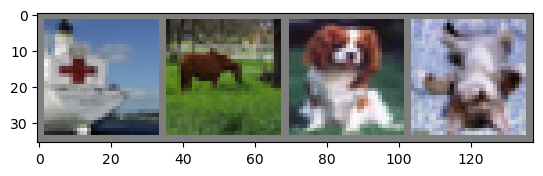

ship  horse dog   cat  


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Let's define a Convolutional neural network. You may want to look into using an existing one, and fine-tuning for you specific application.

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

We'll the define a loss function and optimiser

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

Now we'll train our network, by repeatedly showing it batches of images and corresponding labels

In [6]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.862
[1,  4000] loss: 1.591
[1,  6000] loss: 1.508
[1,  8000] loss: 1.434
[1, 10000] loss: 1.399
[1, 12000] loss: 1.370
[2,  2000] loss: 1.282
[2,  4000] loss: 1.259
[2,  6000] loss: 1.304
[2,  8000] loss: 1.237
[2, 10000] loss: 1.233
[2, 12000] loss: 1.230
[3,  2000] loss: 1.157
[3,  4000] loss: 1.170
[3,  6000] loss: 1.172
[3,  8000] loss: 1.166
[3, 10000] loss: 1.178
[3, 12000] loss: 1.138
[4,  2000] loss: 1.112
[4,  4000] loss: 1.111
[4,  6000] loss: 1.096
[4,  8000] loss: 1.101
[4, 10000] loss: 1.110
[4, 12000] loss: 1.077
[5,  2000] loss: 1.018
[5,  4000] loss: 1.039
[5,  6000] loss: 1.053
[5,  8000] loss: 1.069
[5, 10000] loss: 1.065
[5, 12000] loss: 1.062
[6,  2000] loss: 0.985
[6,  4000] loss: 0.987
[6,  6000] loss: 1.025
[6,  8000] loss: 1.017
[6, 10000] loss: 1.045
[6, 12000] loss: 1.037
[7,  2000] loss: 0.956
[7,  4000] loss: 0.983
[7,  6000] loss: 0.988
[7,  8000] loss: 0.984
[7, 10000] loss: 1.005
[7, 12000] loss: 0.981
[8,  2000] loss: 0.931
[8,  4000] 

In [7]:
# Let's save the trained model to use in another application
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

OK. Lets test our trained model

In [22]:
# Let's create a new network and load our saved model - we don't need to do this, but this just shows you how
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [23]:
dataiter = iter(testloader)

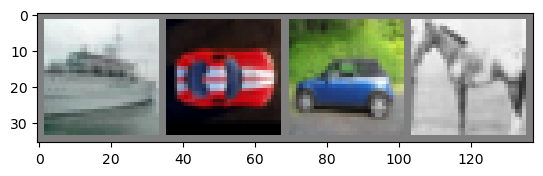

GroundTruth:  ship  car   car   horse
Predicted:  dog   dog   car   horse


In [47]:
# Try re-running the cell a few times...

images, labels = next(dataiter)

# Show test images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

# Lets see how the model did on these test images
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

That doesn't tell us much, maybe we need a more rigourous test, looking at a larger number of test images

In [30]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 60 %


Let's see how it did on individual classes

In [31]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 68.8 %
Accuracy for class: car   is 85.9 %
Accuracy for class: bird  is 40.1 %
Accuracy for class: cat   is 52.6 %
Accuracy for class: deer  is 43.5 %
Accuracy for class: dog   is 56.8 %
Accuracy for class: frog  is 58.2 %
Accuracy for class: horse is 70.3 %
Accuracy for class: ship  is 71.0 %
Accuracy for class: truck is 59.3 %


Hmm, may need some more training time (or data if you are training your own model for our design task)

Training this took some time, but if you go to the original tutorial, https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html you should find additional info on training on a GPU to speed things up.

Executing this on the PI will be slow! Other embedded devices with GPUs or TPUs can make this faster, and you might want to look at https://developer.nvidia.com/tensorrt to optimise for Nvidia GPUs. ALternatively, you may want to consider off-boarding -transmitting your images to another machine to process there.